# Time Series Analysis - Example Notebook


This example is base on an FB workshop: https://github.com/datacamp/datacamp_facebook_live_ny_resolution
<br>

They use Google trends data of keywords 'diet', 'gym' and 'finance' to see how they vary over time. Could there be more searches for these terms in January when we're all trying to turn over a new leaf? 


## Import data

In [7]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set("poster")

* Import data that you downloaded and check out first several rows:

In [3]:
df = pd.read_csv('data/multiTimeline.csv', skiprows=1)
df.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [4]:
df.columns = ['month', 'diet', 'gym', 'finance']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
month      168 non-null object
diet       168 non-null int64
gym        168 non-null int64
finance    168 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


## Start Working with the DateTime Index

* Turn the 'month' column into a datetime data type and make it the index of the DataFrame;

In [19]:
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)

In [20]:
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


Now it's time to explore your DataFrame visually.

## A bit of exploratory data analysis

* Use a built-in `pandas` visualization method to plot your data as 3 line plots on a single figure (one for each column):

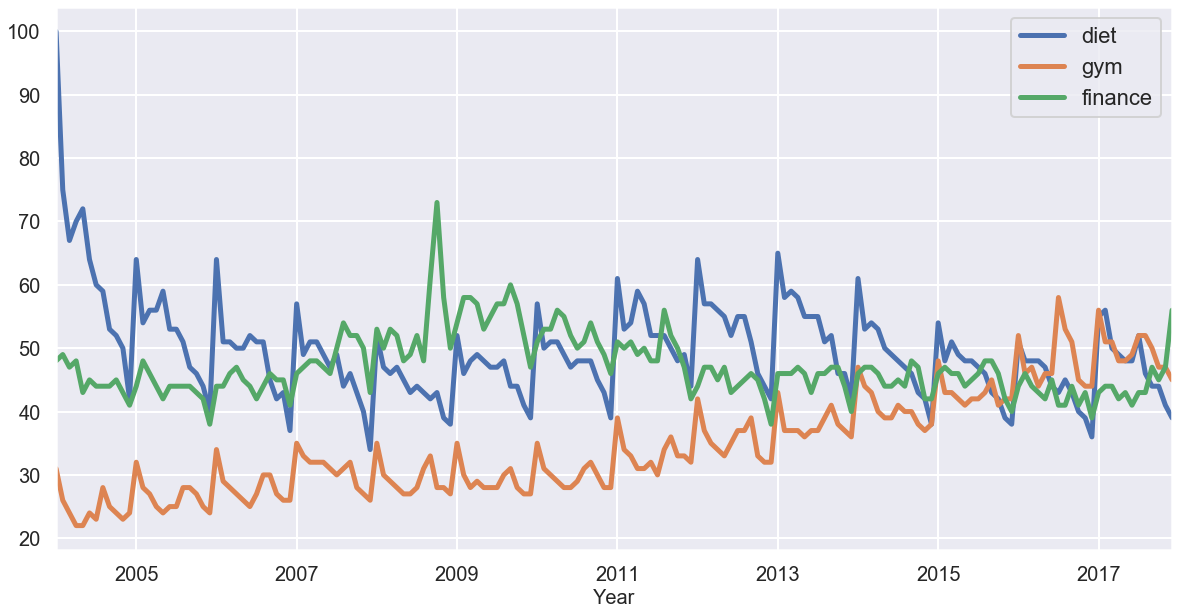

In [21]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

* Plot the 'diet' column by itself as a time series:

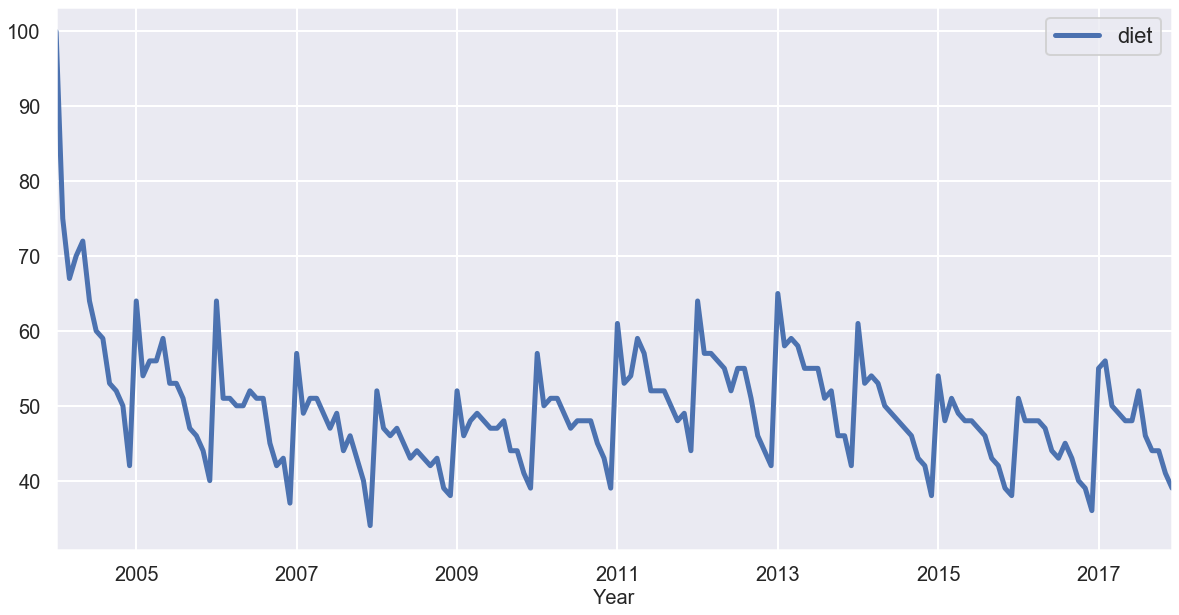

In [22]:
df[['diet']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

## Pandas Resample method
we can use the Pandas Resample method to get a more high-level "buckets" of our data. 

In [30]:
#dfY = df.resample("Y").mean()
dfY = df.resample("Y").max()

In [31]:
dfY.head()

,diet,gym,finance
month,,,
2004-12-31,100,31,49
2005-12-31,64,32,48
2006-12-31,64,34,47
2007-12-31,57,35,54
2008-12-31,52,35,73


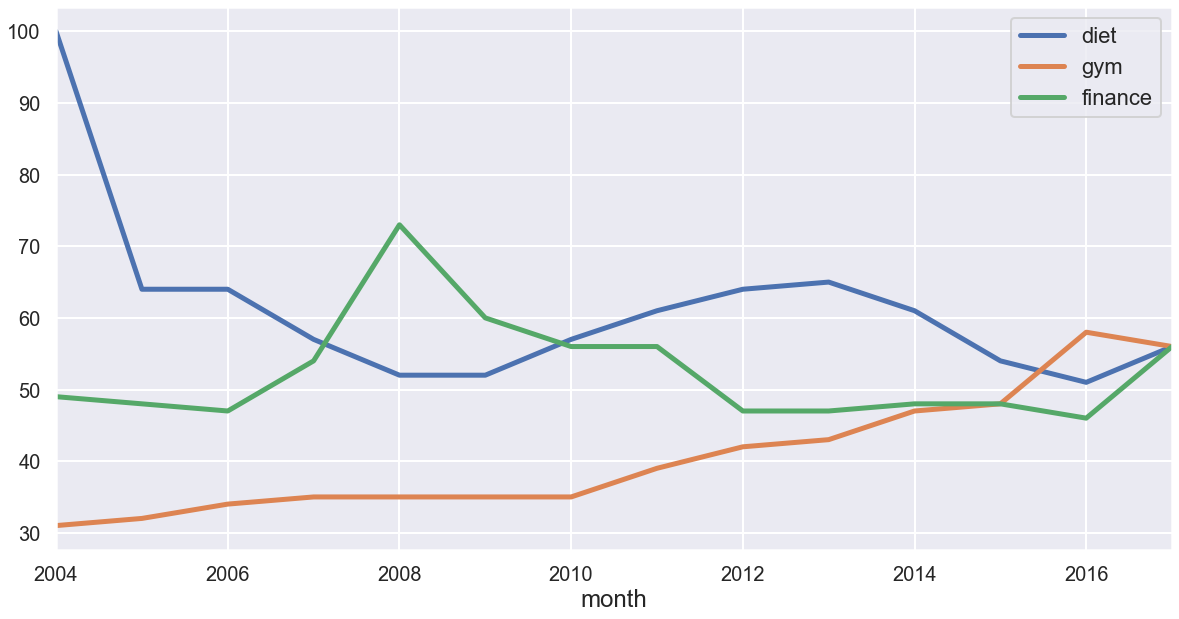

In [32]:
dfY.plot(figsize=(20,10), linewidth=5, fontsize=20)

# In time-series we look for (1) Trends, (2) Seasonality

## Is there a trend?

There are several ways to think about identifying trends in time series. One popular way is by taking a _rolling average_, which means that, for each time point, you take the average of the points on either side of it (the number of points is specified by a _window size_, which you need to choose).

### Check out rolling average:

* Plot the rolling average of 'diet' using built-in `pandas` methods. What window size does it make sense to use?

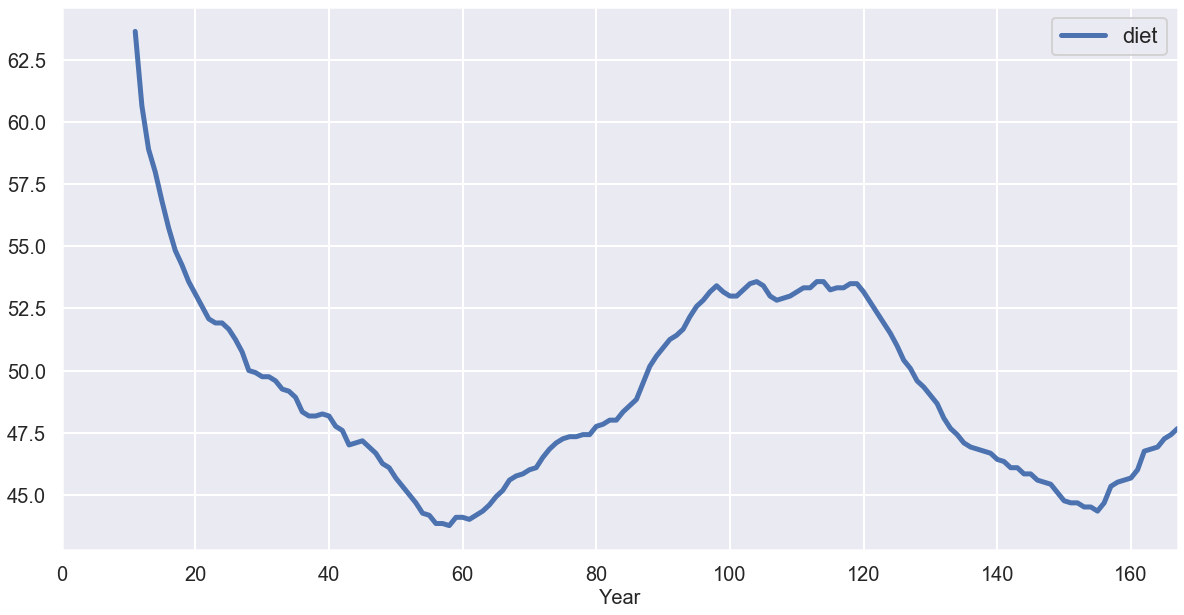

In [16]:
diet = df[['diet']]
diet.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

* Plot the rolling average of 'gym' using built-in `pandas` methods. What window size does it make sense to use?

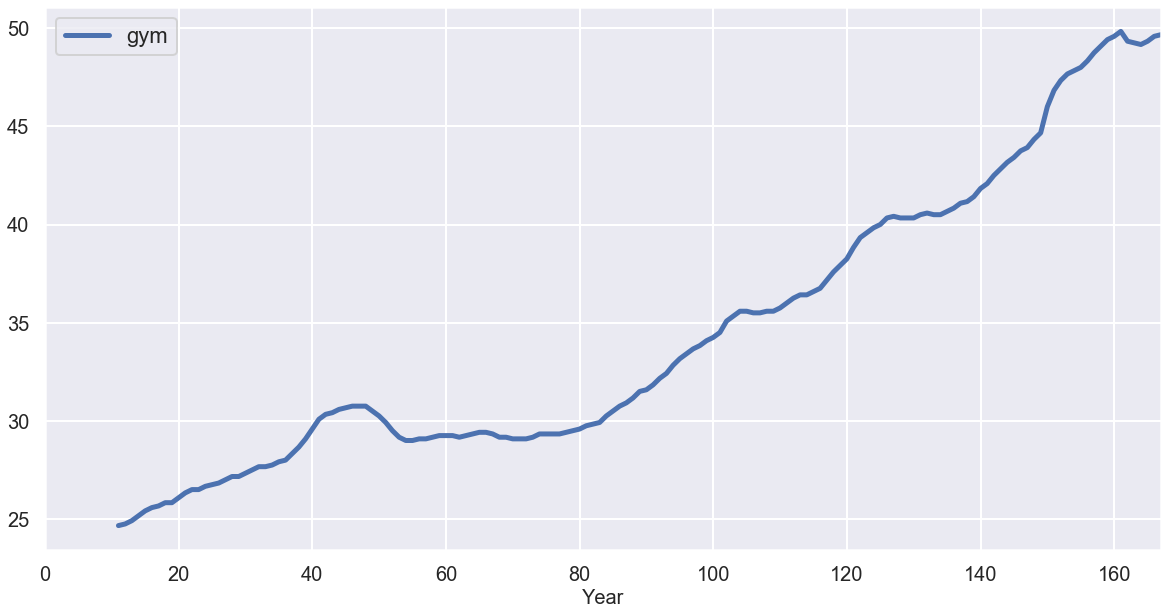

In [17]:
gym = df[['gym']]
gym.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

* Plot the trends of 'gym' and 'diet' on a single figure:

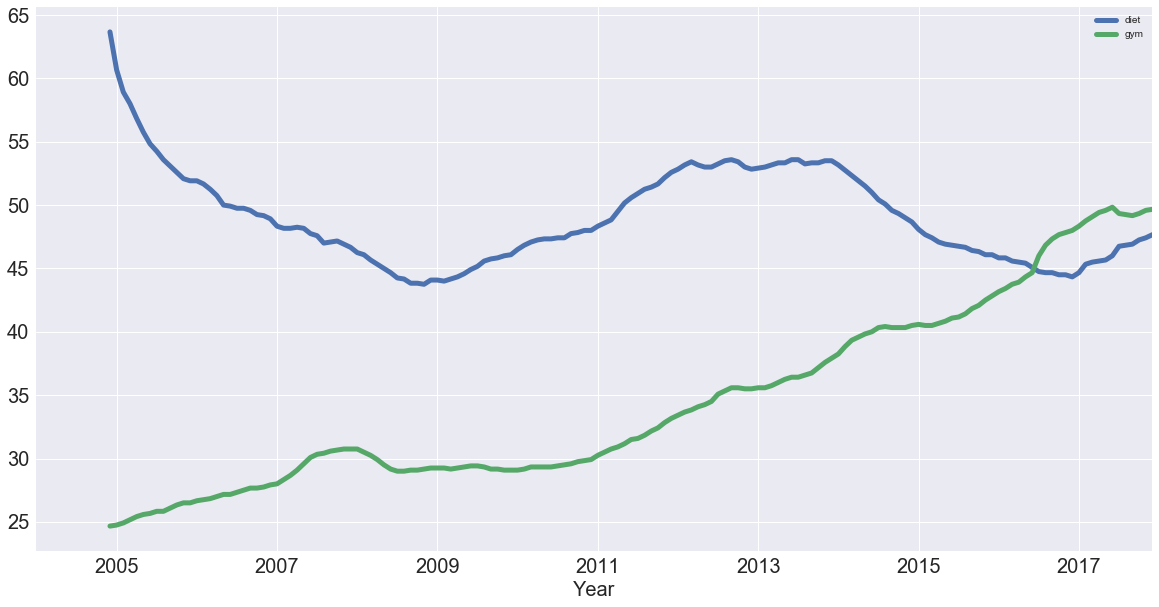

In [24]:
df_rm = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean()], axis=1)
df_rm.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

## Seasonal patterns

You can remove the trend from a time series to investigate seasonality. To remove the trend, you can subtract the trend you computed above (rolling mean) from the original signal. This, however, will be dependent on how many data points you averaged over. Another way to remove the trend is called **differencing**, where you look at the difference between successive data points (called first-order differencing).

### First-order differencing

* Use `pandas` to compute and plot the first order difference of the 'diet' series:

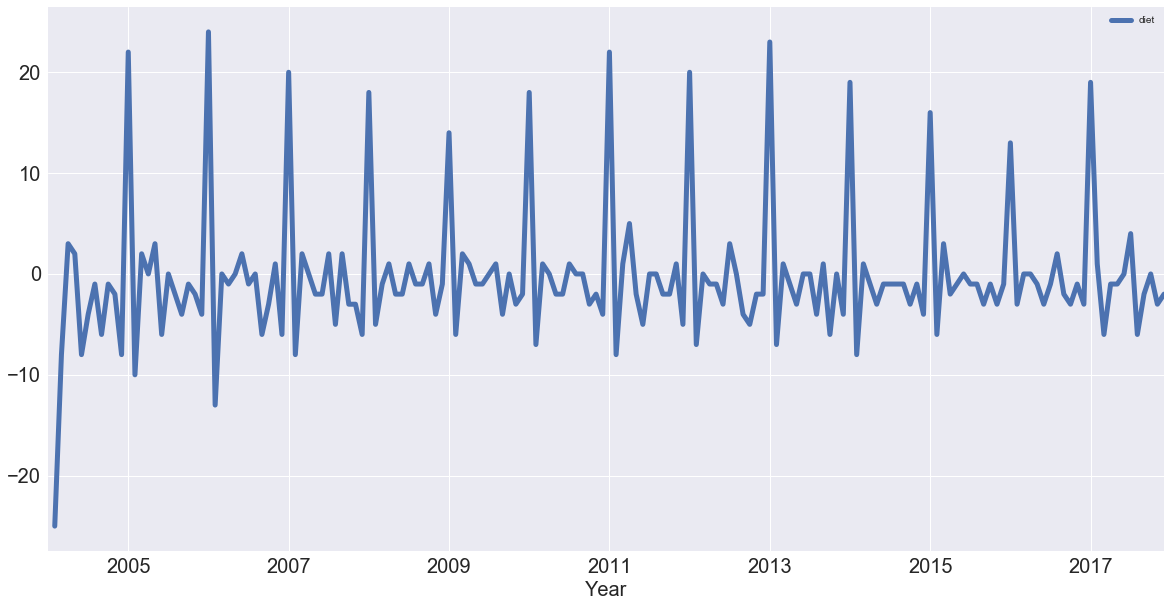

In [26]:
diet.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

See that you have removed much of the trend and _you can really see the peaks in January every year_. Note: You can also perform 2nd order differencing if the trend is not yet entirely removed. See [here](https://www.otexts.org/fpp/8/1) for more on differencing.

Differencing is super helpful in turning your time series into a **stationary time series**. We won't get too much into these here but a **stationary time series** is one whose statistical properties (such as mean & variance) don't change over time. **Stationary time series** are useful because many time series forecasting methods are based on the assumption that the time series is approximately stationary.

### Periodicity and Autocorrelation

A time series is _periodic_ if it repeats itself at equally spaced intervals, say, every 12 months. Another way to think of this is that if the time series has a peak somewhere, then it will have a peak 12 months after that and, if it has a trough somewhere, it will also have a trough 12 months after that. Yet another way of thinking about this is that the time series is _correlated_ with itself shifted by 12 months. 

Considering the correlation of a time series with such a shifted version of itself is captured by the concept of _autocorrelation_. We'll get to this in a minute. First, let's remind ourselves about correlation:

### Correlation of time series

* Compute the correlation coefficients of all of these time series:

In [33]:
df.corr()

,diet,gym,finance
diet,1.000000,-0.100764,-0.034639
gym,-0.100764,1.000000,-0.284279
finance,-0.034639,-0.284279,1.000000


* Plot the first-order differences of these time series (removing the trend may reveal correlation in seasonality):

In [44]:
df.diff().head()

,diet,gym,finance
month,,,
2004-01-01,NaN,NaN,NaN
2004-02-01,-25.0,-5.0,1.0
2004-03-01,-8.0,-2.0,-2.0
2004-04-01,3.0,-2.0,1.0
2004-05-01,2.0,0.0,-5.0


In [47]:
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


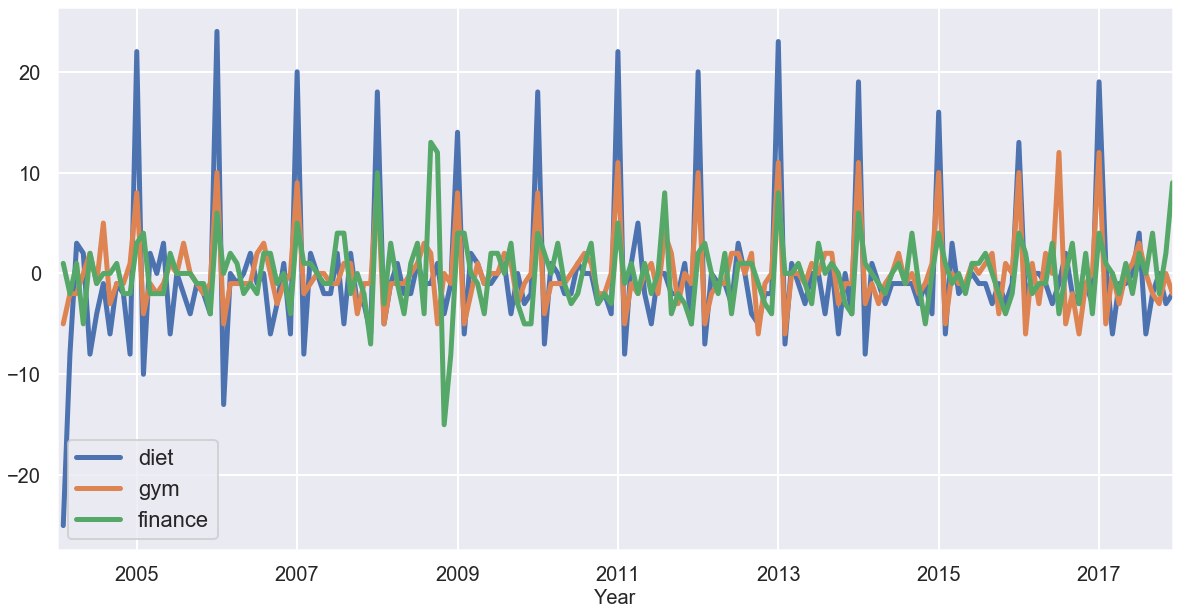

In [34]:
df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

* Compute the correlation coefficients of the first-order differences of these time series (removing the trend may reveal correlation in seasonality):

In [35]:
df.diff().corr()

,diet,gym,finance
diet,1.000000,0.758707,0.373828
gym,0.758707,1.000000,0.301111
finance,0.373828,0.301111,1.000000


## Autocorrelation

Now we've taken a dive into correlation of variables and correlation of time series, it's time to plot the autocorrelation of the 'diet' series: on the x-axis you have the lag and on the y-axis you have how correlated the time series is with itself at that lag. For example, if the original time series repeats itself every two days, you would expect to see a spike in the autocorrelation function at 2 days.

* Plot the autocorrelation function of the time series diet:

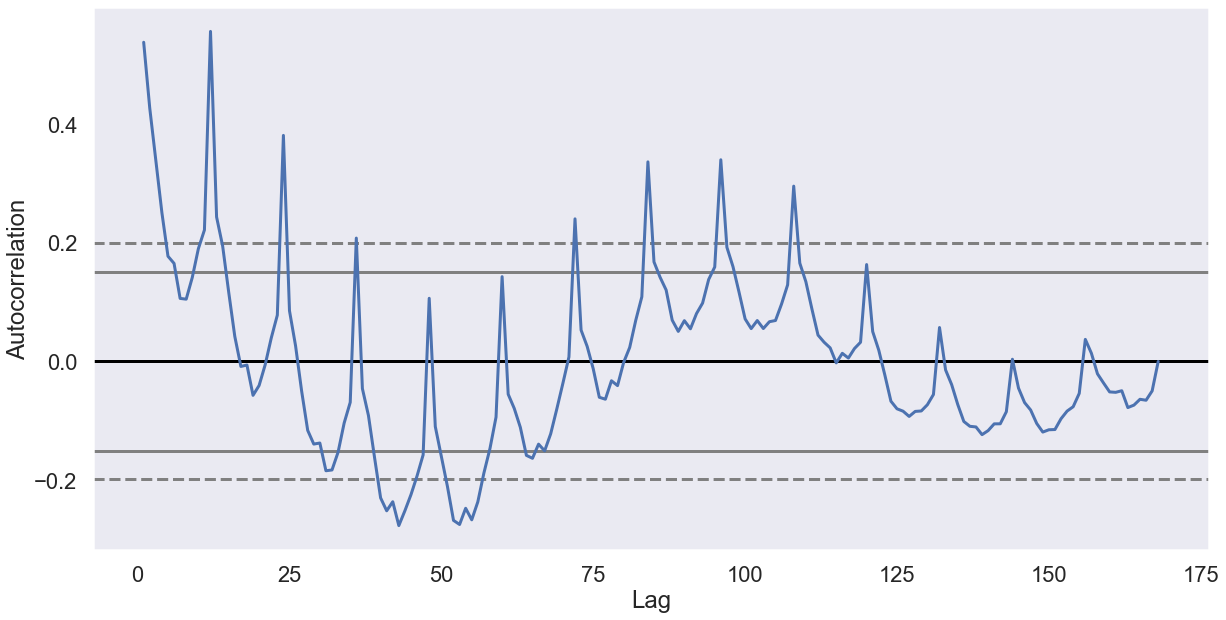

In [43]:
fig,ax = plt.subplots(figsize=(20,10))
pd.plotting.autocorrelation_plot(diet,ax=ax);

# Shifting:
we can shift the data, to keep the index but take the data from future time. Why?
<br>
First of all, if we want to predict the future based on the past...


In [49]:
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


In [50]:
df.shift(2).head(7)

,diet,gym,finance
month,,,
2004-01-01,NaN,NaN,NaN
2004-02-01,NaN,NaN,NaN
2004-03-01,100.0,31.0,48.0
2004-04-01,75.0,26.0,49.0
2004-05-01,67.0,24.0,47.0
2004-06-01,70.0,22.0,48.0
2004-07-01,72.0,22.0,43.0


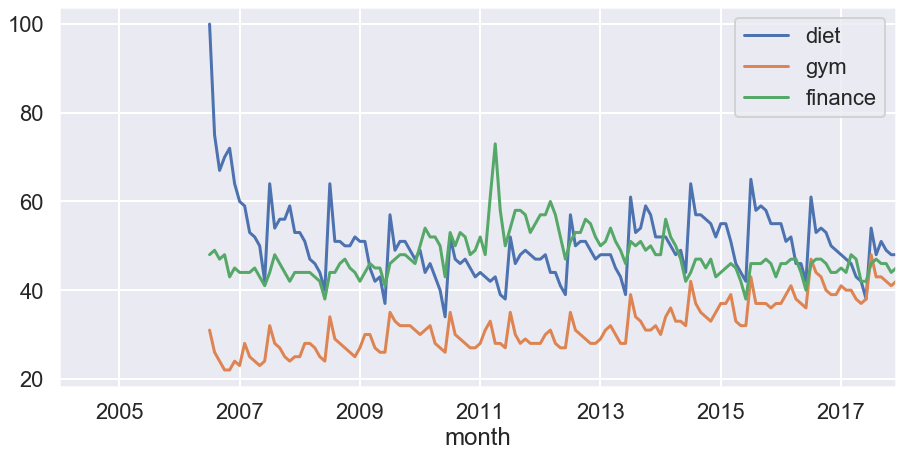

In [54]:
df.shift(30).plot(figsize=(15,7))